In [67]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# randomly choose from 1-6 to simulate dice roll
def roll_d6():
    return random.choice(range(1,7))

# simulate 1 round of risk combat, 
def risk_combat(attackers=3, defenders=2, silent=True):
    attackers_0 = attackers
    defenders_0 = defenders
    
    attacker_rolls = sorted([roll_d6() for _ in range(min(attackers, 3))])[::-1]
    defender_rolls = sorted([roll_d6() for _ in range(min(defenders, 3))])[::-1]

    if attacker_rolls[0] <= defender_rolls[0]:
        attackers -= 1
    else:
        defenders -= 1
    try:
        if attacker_rolls[1] <= defender_rolls[1]:
            attackers -= 1
        else:
            defenders -= 1
    except:
        # the above try will fail if there aren't enough rolls to access X_rolls[1], so skip over it
        pass
    if not silent:
        print(f'attackers rolled: {attacker_rolls}')
        print(f'defenders rolled: {defender_rolls}')
        print(f'Attackers lose {attackers_0 - attackers}, defenders lose {defenders_0 - defenders}')

    # how many have each side lost
    return {
        "attacker_diff": attackers - attackers_0,
        "defender_diff": defenders - defenders_0
    }
    

risk_combat(silent=False)


attackers rolled: [5, 3, 2]
defenders rolled: [5, 2]
Attackers lose 1, defenders lose 1


{'attacker_diff': -1, 'defender_diff': -1}

In [62]:
simulation_results = [risk_combat() for _ in range(1000)]

In [63]:
len(simulation_results)

1000

In [123]:
simulation_df = pd.DataFrame(simulation_results)
simulation_df.head()

,attacker_diff,defender_diff
0,-1,-1
1,0,-2
2,0,-2
3,-1,-1
4,0,-2


In [126]:
def annotate_results(row):
    return f"Attackers lose {-1*row.attacker_diff}, Defenders lose {-1*row.defender_diff}"
    
simulation_df['result_summary'] = simulation_df.apply(annotate_results, axis=1)
simulation_df.head()

,attacker_diff,defender_diff,result_summary
0,-1,-1,"Attackers lose 1, Defenders lose 1"
1,0,-2,"Attackers lose 0, Defenders lose 2"
2,0,-2,"Attackers lose 0, Defenders lose 2"
3,-1,-1,"Attackers lose 1, Defenders lose 1"
4,0,-2,"Attackers lose 0, Defenders lose 2"


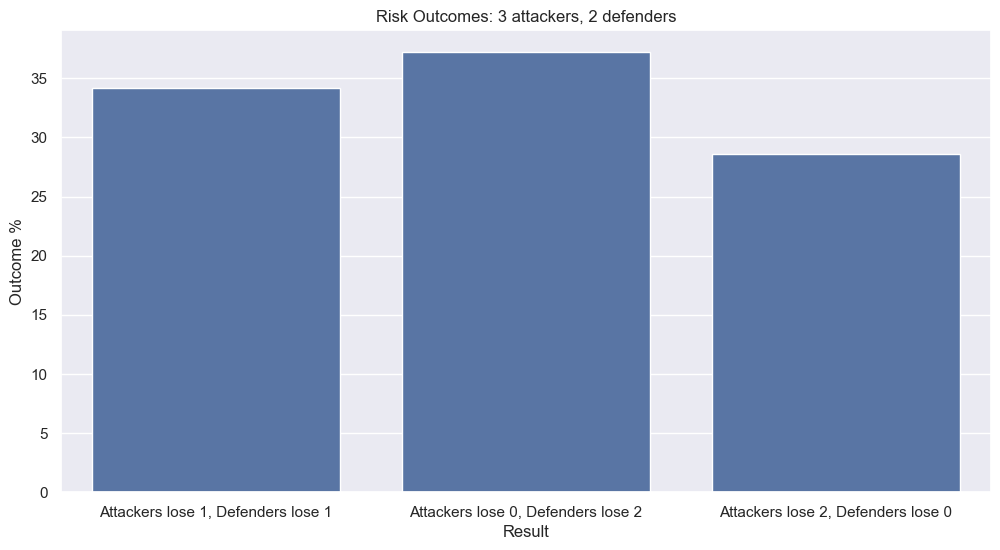

In [132]:
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
sns.countplot(data=simulation_df, x='result_summary', stat='percent')
plt.title('Risk Outcomes: 3 Attackers, 2 Defenders')
plt.xlabel('Result')
plt.ylabel('Outcome %')
plt.show()

In [133]:
count_data = pd.DataFrame(simulation_df.groupby('result_summary').size()).reset_index().rename(columns={0:'count'})
count_data

,result_summary,count
0,"Attackers lose 0, Defenders lose 2",372
1,"Attackers lose 1, Defenders lose 1",342
2,"Attackers lose 2, Defenders lose 0",286


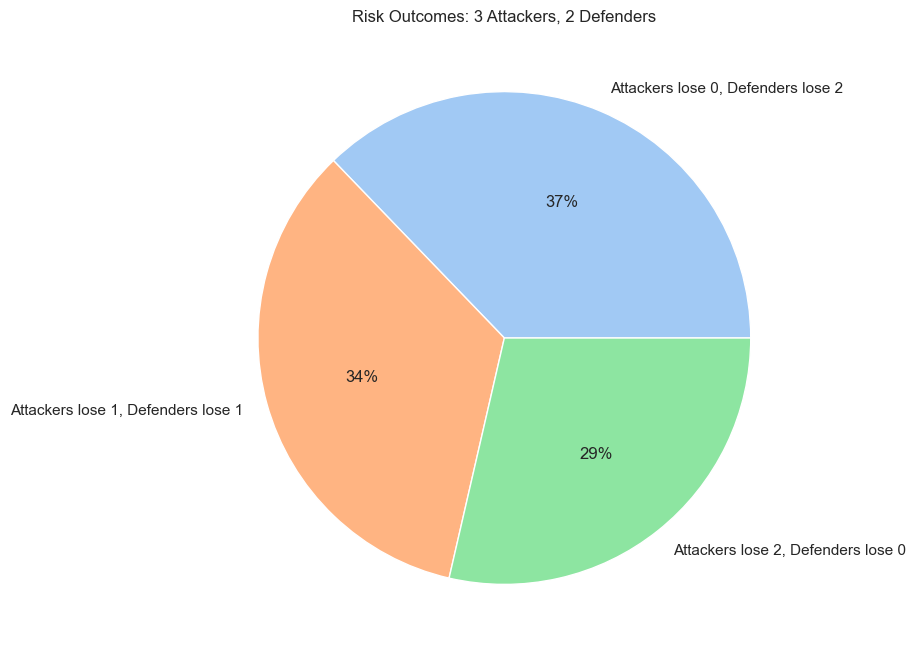

In [134]:
colours = sns.color_palette('pastel')[0:len(count_data)]
plt.figure(figsize=(12,8))
plt.pie(x=count_data['count'], labels=count_data['result_summary'], colors=colours, autopct='%.0f%%')
plt.title("Risk Outcomes: 3 Attackers, 2 Defenders")
plt.show()

## Simulating multiple rounds of combat

In [77]:
def risk_war(attacking_army, defending_army, silent=True):
    # if either army has no troops then return the result
    if attacking_army <= 0:
        return 'Defenders win'
    if defending_army <= 0:
        return 'Attackers win'

    # find out how many troops each army loses, then take that away from their totals to get the new army sizes
    skirmish_results = risk_combat(min(attacking_army, 3), min(defending_army, 2), silent=silent)
    attacking_army += skirmish_results['attacker_diff']
    defending_army += skirmish_results['defender_diff']
    if not silent:
        print(f'Attacking army size: {attacking_army}')
        print(f'Defending army size: {defending_army}')
    # repeat with the new smaller army sizes until one drops to 0 
    return risk_war(attacking_army, defending_army, silent=silent)

    
risk_war(attacking_army=10, defending_army=10, silent=False)
    

attackers rolled: [6, 4, 3]
defenders rolled: [2, 1]
Attackers lose 0, defenders lose 2
Attacking army size: 10
Defending army size: 8
attackers rolled: [5, 4, 1]
defenders rolled: [6, 2]
Attackers lose 1, defenders lose 1
Attacking army size: 9
Defending army size: 7
attackers rolled: [3, 3, 1]
defenders rolled: [4, 1]
Attackers lose 1, defenders lose 1
Attacking army size: 8
Defending army size: 6
attackers rolled: [5, 4, 3]
defenders rolled: [6, 3]
Attackers lose 1, defenders lose 1
Attacking army size: 7
Defending army size: 5
attackers rolled: [4, 4, 1]
defenders rolled: [6, 2]
Attackers lose 1, defenders lose 1
Attacking army size: 6
Defending army size: 4
attackers rolled: [5, 4, 4]
defenders rolled: [5, 1]
Attackers lose 1, defenders lose 1
Attacking army size: 5
Defending army size: 3
attackers rolled: [5, 4, 1]
defenders rolled: [5, 4]
Attackers lose 2, defenders lose 0
Attacking army size: 3
Defending army size: 3
attackers rolled: [6, 4, 2]
defenders rolled: [6, 3]
Attacker

'Defenders win'

In [135]:
results = []
for a in range(1,11):
    for d in range(1,11):
        sim = []
        for i in range(1000):
            sim.append(risk_war(a, d))
        results.append(pd.DataFrame({'attackers': a, 'defenders': d, 'result': sim}))

result_df = pd.concat(results)
result_df.head()

,attackers,defenders,result
0,1,1,Defenders win
1,1,1,Defenders win
2,1,1,Defenders win
3,1,1,Attackers win
4,1,1,Defenders win


In [136]:
result_summary_df = result_df.groupby(['attackers', 'defenders', 'result']).size().reset_index().rename(columns={0:'wins'})
result_summary_df

,attackers,defenders,result,wins
0,1,1,Attackers win,379
1,1,1,Defenders win,621
2,1,2,Attackers win,98
3,1,2,Defenders win,902
4,1,3,Attackers win,29
...,...,...,...,...
186,10,8,Defenders win,268
187,10,9,Attackers win,630
188,10,9,Defenders win,370
189,10,10,Attackers win,553


In [140]:
pivoted_df = result_summary_df.pivot(index=['attackers', 'defenders'], columns='result', values='wins').reset_index()
# if one side never wins then pivot gives NaN, so need to fill with 0
pivoted_df = pivoted_df.fillna(0)
pivoted_df

result,attackers,defenders,Attackers win,Defenders win
0,1,1,379.0,621.0
1,1,2,98.0,902.0
2,1,3,29.0,971.0
3,1,4,6.0,994.0
4,1,5,0.0,1000.0
...,...,...,...,...
95,10,6,843.0,157.0
96,10,7,822.0,178.0
97,10,8,732.0,268.0
98,10,9,630.0,370.0


In [141]:
pivoted_df['attacker_win_rate'] = pivoted_df['Attackers win']/1000
pivoted_df['defender_win_rate'] = 1-pivoted_df['attacker_win_rate']
pivoted_df.head()

result,attackers,defenders,Attackers win,Defenders win,attacker_win_rate,defender_win_rate
0,1,1,379.0,621.0,0.379,0.621
1,1,2,98.0,902.0,0.098,0.902
2,1,3,29.0,971.0,0.029,0.971
3,1,4,6.0,994.0,0.006,0.994
4,1,5,0.0,1000.0,0.000,1.000


In [116]:
pivoted_df[pivoted_df['attackers']==8]

result,attackers,defenders,Attackers win,Defenders win,attacker_win_rate,defender_win_rate
54,8,2,980,20,0.980,0.020
55,8,3,942,58,0.942,0.058
56,8,4,887,113,0.887,0.113
57,8,5,808,192,0.808,0.192
58,8,6,723,277,0.723,0.277
59,8,7,668,332,0.668,0.332
60,8,8,543,457,0.543,0.457
61,8,9,459,541,0.459,0.541
62,8,10,382,618,0.382,0.618


In [142]:
pivoted_df.pivot(index='attackers', columns='defenders', values='attacker_win_rate')

defenders,1,2,3,4,5,6,7,8,9,10
attackers,,,,,,,,,,
1,0.379,0.098,0.029,0.006,0.000,0.000,0.000,0.000,0.000,0.000
2,0.734,0.360,0.199,0.093,0.047,0.014,0.008,0.009,0.003,0.000
3,0.918,0.642,0.463,0.301,0.173,0.141,0.082,0.038,0.032,0.024
4,0.973,0.792,0.658,0.443,0.348,0.237,0.177,0.116,0.074,0.057
5,0.990,0.883,0.786,0.648,0.533,0.416,0.278,0.229,0.162,0.111
6,0.998,0.928,0.866,0.767,0.663,0.510,0.419,0.336,0.254,0.201
7,0.998,0.965,0.915,0.835,0.729,0.630,0.534,0.431,0.347,0.276
8,1.000,0.982,0.948,0.888,0.811,0.721,0.664,0.549,0.453,0.374
9,0.999,0.989,0.976,0.941,0.869,0.807,0.729,0.650,0.562,0.462


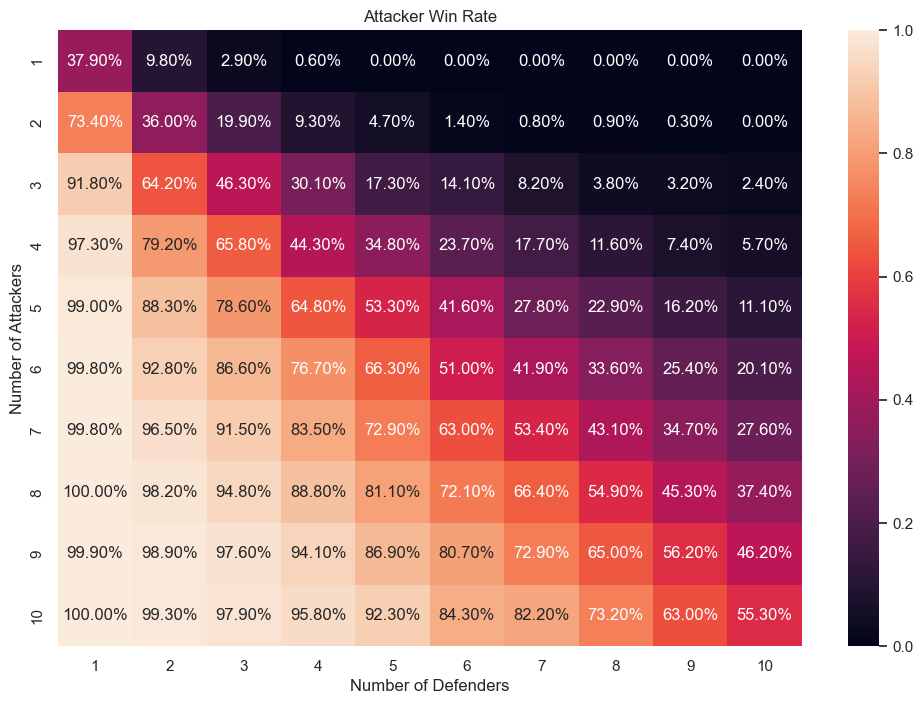

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(data=pivoted_df.pivot(index='attackers', columns='defenders', values='attacker_win_rate'), annot=True, fmt='.2%')
plt.title('Attacker Win Rate')
plt.xlabel('Number of Defenders')
plt.ylabel('Number of Attackers')
plt.show()

Attackers and defenders each have their own advantages - attackers get to roll 3 dice against 2, but defenders only have to match the number rolled rather than exceed it. It looks like when both armies are the same size, the defender's advantage is more important for smaller armies, but when there are 5 or more on each side, the attackers getting more rolls becomes more of an advantage.

As an attacker then, you should be confident of winning (win 80-90% of the time) if you have at least 3 more units, and attacking a larger defending army is never in the attacker's favour (at least for army sizes of up to 10)